In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

from numpy import log
from pandas import Series
from datetime import datetime

In [ ]:
# always take data in squeance order when doing timeseires

In [78]:
df = pd.read_csv('Super_Store.csv', encoding='unicode_escape', parse_dates=['Order Date']).sort_values('Order Date')

In [79]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,7475,CA-2014-167199,2014-01-06,1/10/2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
631,2979,CA-2014-109232,2014-01-13,1/16/2014,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 1577 to 186
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121

In [81]:
df_new = df[['Order Date','Sales']]

In [82]:
df_new.head()

,Order Date,Sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
631,2014-01-13,545.940


In [83]:
df_new.tail()

,Order Date,Sales
1619,2017-12-29,258.750
1617,2017-12-29,1207.840
1057,2017-12-29,101.120
1618,2017-12-29,300.980
186,2017-12-30,323.136


In [84]:
df_new[df_new.duplicated()]

,Order Date,Sales
719,2014-04-23,281.372
1759,2015-07-05,4.928
1238,2016-07-04,25.400


In [85]:

df_new[df_new['Order Date']== '2014-04-23' ]

,Order Date,Sales
720,2014-04-23,281.372
719,2014-04-23,281.372
721,2014-04-23,22.336


In [86]:
# 719 and 720 have same values 
# dropping duplicates

In [87]:
df_new = df_new.drop_duplicates()

In [88]:
df_new.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118 entries, 1577 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2118 non-null   datetime64[ns]
 1   Sales       2118 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.6 KB


In [90]:
df['Order Date'].nunique()

889

In [91]:
# rows are 2118 but unique date are 889 only
# therefore group by date and taking avg sale vaue

In [92]:
df_new = df_new.groupby('Order Date').agg('mean')

In [93]:
df_new.head()

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,439.9695


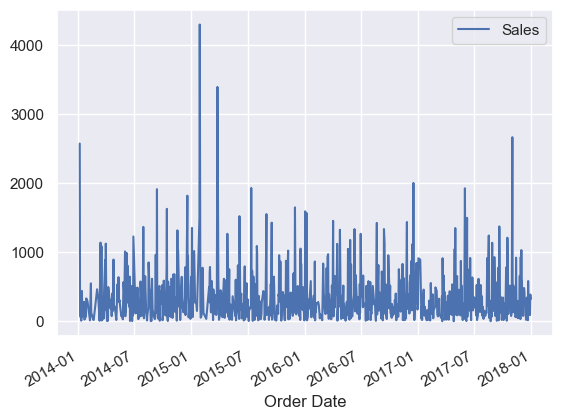

In [94]:
df_new.plot()
plt.show()

In [95]:
df_monthly = df_new.resample('M').mean()

In [98]:
df_monthly.head()

,Sales
Order Date,
2014-01-31,348.226731
2014-02-28,147.924933
2014-03-31,447.867029
2014-04-30,264.305048
2014-05-31,274.401865


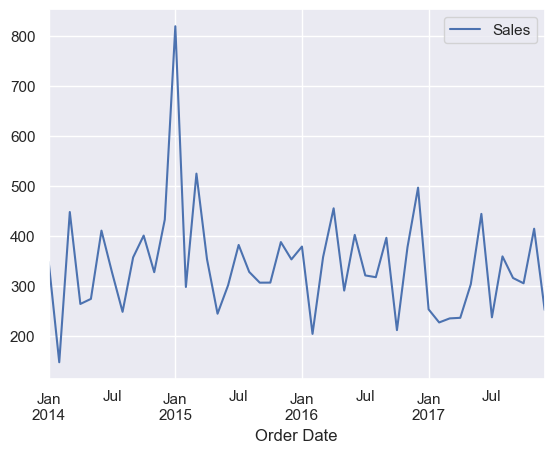

In [97]:
# taking monthly sales
df_monthly.plot()

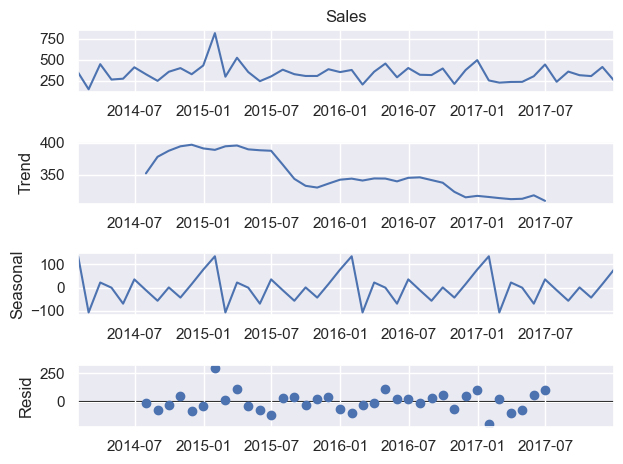

In [100]:
# Decomposition to check dataset pattern/component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_monthly['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()

In [102]:
# Check whether autocorrelation there in the dataset or not ?
# Positive Autocorrelation found 

import statsmodels.api as sm
sm.stats.durbin_watson(df_monthly['Sales'])

0.1846299581288283

### Augmented Dickey Fuller Test 
TO check time series is sationary or not

In [103]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_monthly['Sales'])


(-7.145741259532844,
 3.23638681709549e-10,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 457.41403854238564)

In [105]:
# for readbility purpose
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("***************Augmented Dickey Fuller Test***************")
    labels = ['ADF Stats Test','p-value','#Lags','No. of obs']
    
    for a, b in zip(result, labels):
        print(b + " : "+ str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries is Non-Stationary")    

In [107]:
adf_check(df_monthly['Sales'])

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -7.145741259532844
p-value : 3.23638681709549e-10
#Lags : 0
No. of obs : 47
Strong evidence against null hypothesis and my timeseries is Stationary


In [ ]:
# therefore value for p is 0 for trend